# Thmany  

### import libs

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Function for calculating Time of Listening for Every Category of Episode

In [67]:
def calculateTimeOFListeningForEverycategory(df):
  categories = {}
  for category in df['category'].unique():
    categories[category] = 0
  for category in categories:
    categorieData = df[df['category'] == category]
    categories[category] = categorieData['duration_seconds'].sum()
  return categories

#### Function to convert text to numbers

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def textToStringUsingOneHotEmcoding(columnNumber : int,df):
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[columnNumber])], remainder='passthrough')
  encodedFile = np.array(ct.fit_transform(df))
  return encodedFile

### Function to handel empity data

In [69]:
from sklearn.impute import SimpleImputer

def handelEmityData(df,typeOfStrategy:str):
  imputer = SimpleImputer(missing_values=np.nan, strategy=typeOfStrategy)
  imputer.fit(df)
  encodedData = imputer.transform(df)
  return pd.DataFrame(encodedData, columns=df.columns)

### load the files

In [70]:
usersData = pd.read_csv("users.csv")
episodesData = pd.read_csv("episodes.csv")
listensData = pd.read_json("listens.json")

In [71]:
print(usersData)

    user_id  age  gender       country
0         1   38  female       Morocco
1         2   30  female        Jordan
2         3   42    male  Saudi Arabia
3         4   57  female         Egypt
4         5   51  female        Jordan
5         6   59    male       Morocco
6         7   30    male         Egypt
7         8   45  female        Jordan
8         9   43  female         Egypt
9        10   44    male        Jordan
10       11   41    male       Morocco
11       12   52  female        Jordan
12       13   40  female        Jordan
13       14   19  female       Morocco
14       15   42    male           UAE
15       16   24  female  Saudi Arabia
16       17   21    male  Saudi Arabia
17       18   52    male  Saudi Arabia
18       19   42    male         Egypt
19       20   32  female         Egypt


In [72]:
print(episodesData)

    episode_id       title    category
0            1   Episode 1    Religion
1            2   Episode 2  Technology
2            3   Episode 3     Society
3            4   Episode 4        News
4            5   Episode 5    Politics
5            6   Episode 6     Society
6            7   Episode 7    Religion
7            8   Episode 8      Sports
8            9   Episode 9      Sports
9           10  Episode 10        News
10          11  Episode 11      Sports
11          12  Episode 12      Sports
12          13  Episode 13     Society
13          14  Episode 14     Society
14          15  Episode 15        News
15          16  Episode 16    Politics
16          17  Episode 17      Sports
17          18  Episode 18        News
18          19  Episode 19    Politics
19          20  Episode 20     Society
20          21  Episode 21     Society
21          22  Episode 22     Society
22          23  Episode 23      Sports
23          24  Episode 24     Society
24          25  Episode 2

In [248]:
print(listensData)

    user_id  episode_id  duration_seconds
0        16          30                60
1         6           8               120
2         6          13                60
3         6          27              1500
4        17           9              1500
..      ...         ...               ...
95       16          28               900
96       19           9                60
97       12           2              1500
98        1           1              1800
99       15          16               900

[100 rows x 3 columns]


In [249]:
episodesData = handelEmityData(episodesData,"most_frequent")
usersData = handelEmityData(usersData,"most_frequent")


In [77]:
print(usersData)
print(episodesData)

   user_id age  gender       country
0        1  38  female       Morocco
1        2  30  female        Jordan
2        3  42    male  Saudi Arabia
3        4  57  female         Egypt
4        5  51  female        Jordan
5        6  59    male       Morocco
6        7  30    male         Egypt
7        8  45  female        Jordan
8        9  43  female         Egypt
9       10  44    male        Jordan
10      11  41    male       Morocco
11      12  52  female        Jordan
12      13  40  female        Jordan
13      14  19  female       Morocco
14      15  42    male           UAE
15      16  24  female  Saudi Arabia
16      17  21    male  Saudi Arabia
17      18  52    male  Saudi Arabia
18      19  42    male         Egypt
19      20  32  female         Egypt
   episode_id       title    category
0           1   Episode 1    Religion
1           2   Episode 2  Technology
2           3   Episode 3     Society
3           4   Episode 4        News
4           5   Episode 5    Poli

### merging the data

In [78]:
mergerdData = pd.DataFrame()
for row in listensData.values:
  userInfo = usersData[usersData['user_id'] == row[0]].copy()
  episodeInfo = episodesData[episodesData['episode_id'] == row[1]].copy()
  duration = row[2]

  finalData = pd.concat([userInfo.reset_index(drop=True), episodeInfo.reset_index(drop=True)], axis=1,join="inner")
  finalData['duration_seconds'] = duration

  mergerdData = pd.concat([mergerdData, finalData], ignore_index=True)
print(mergerdData)

   user_id age  gender       country  episode_id       title    category  \
0       16  24  female  Saudi Arabia          30  Episode 30      Sports   
1        6  59    male       Morocco           8   Episode 8      Sports   
2        6  59    male       Morocco          13  Episode 13     Society   
3        6  59    male       Morocco          27  Episode 27        News   
4       17  21    male  Saudi Arabia           9   Episode 9      Sports   
..     ...  ..     ...           ...         ...         ...         ...   
95      16  24  female  Saudi Arabia          28  Episode 28        News   
96      19  42    male         Egypt           9   Episode 9      Sports   
97      12  52  female        Jordan           2   Episode 2  Technology   
98       1  38  female       Morocco           1   Episode 1    Religion   
99      15  42    male           UAE          16  Episode 16    Politics   

    duration_seconds  
0                 60  
1                120  
2                 

### find the most listened to episode categories?

The Most Listened Categorie is Sports with : 23280 s 


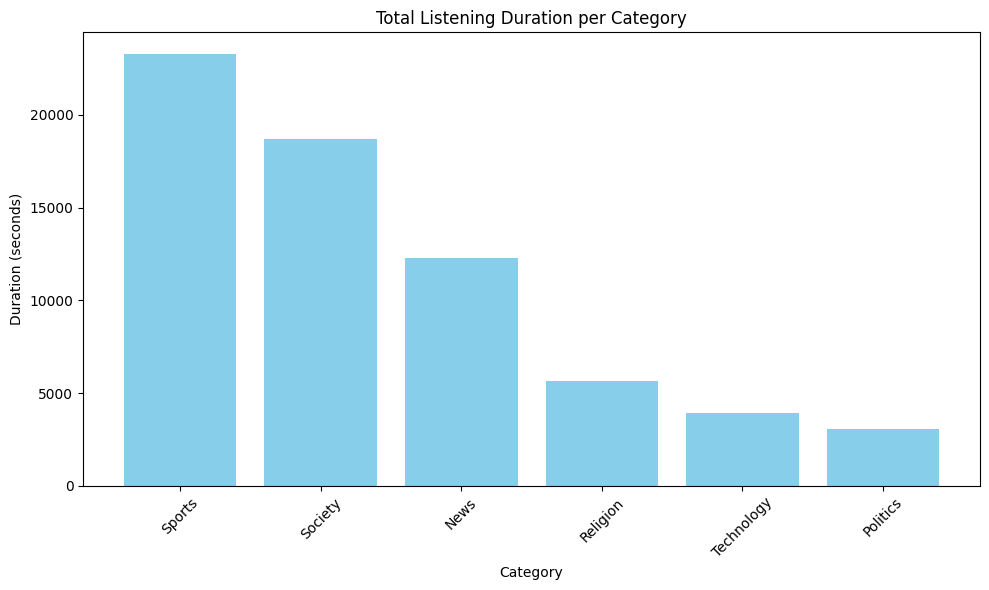

In [79]:
categories = calculateTimeOFListeningForEverycategory(mergerdData)
max_key = max(categories, key = categories.get)
mostListenedCategory = categories[max_key]
print("The Most Listened Categorie is",max_key,"with :", mostListenedCategorie,"s ")

plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), categories.values(), color='skyblue')
plt.title('Total Listening Duration per Category')
plt.xlabel('Category')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Difference in average listening time between males and females

The average  listening time of Male: 573.1914893617021
The average  listening time of Famale 753.9622641509434


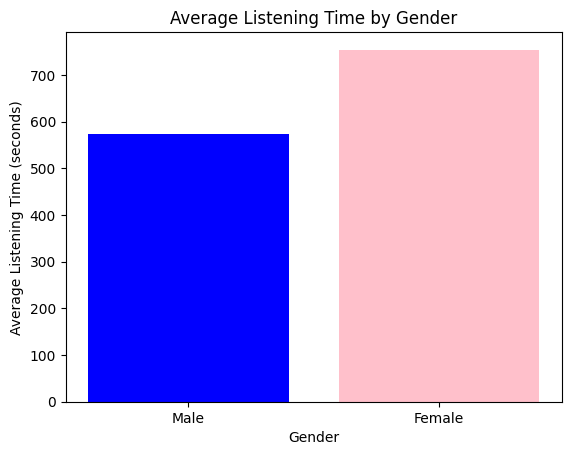

In [80]:
maleData = mergerdData[mergerdData['gender'] == 'male']
meanDurationMale = maleData['duration_seconds'].mean()
print("The average  listening time of Male:", meanDurationMale)

femaleData = mergerdData[mergerdData['gender'] == 'female']
meanDurationFemale = femaleData['duration_seconds'].mean()
print("The average  listening time of Famale", meanDurationFemale)

genders = ['Male', 'Female']
avg_durations = [meanDurationMale, meanDurationFemale]

plt.bar(genders, avg_durations, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Listening Time (seconds)')
plt.title('Average Listening Time by Gender')
plt.show()

### Average number of episodes listened to by a user

In [81]:
averageListenedTime = []
for userId in eUsersData['user_id']:
  userListened = mergerdData[mergerdData['user_id'] == userId]
  userListened = userListened[userListened['duration_seconds'] != 0]
  averageListenedTime.append(len(userListened['episode_id'].unique()))

print("Average number of episodes listened per user:",np.mean(averageListenedTime))


Average number of episodes listened per user: 4.2


### Function for Generate Initial Recommendations

In [278]:
def recommend_episodes(user_id: int, listens_df, episodes_df):
  user = listens_df[listens_df['user_id'] == user_id].sort_values(by='duration_seconds', ascending=False).head(1)
  if user.empty:
    return "The user doesnt see any episode"

  episodesId = user['episode_id'].values[0]
  categoryOfEpisodes = episodes_df[episodes_df['episode_id'] == episodesId]['category'].values[0]

  episodes = episodes_df[episodes_df['category'] == categoryOfEpisodes]
  threeEpisodes = episodes[episodes['episode_id'] != episodesId]

  return threeEpisodes['title'].sample(n=min(3, len(threeEpisodes))).values


In [280]:
recommendations = recommend_episodes(10,listensData,episodesData)
print(recommendations)

['Episode 6' 'Episode 24' 'Episode 22']


### Additional New Indicators




*   Considering the available data, age is a key indicator for understanding user behavior, since different age groups tend to prefer different topics. Segmenting listening patterns by age helps recommend episodes that align with each group’s interests.
*   Country or region is another important indicator, as cultural and local interests vary geographically; understanding listeners’ locations enables tailoring recommendations to their cultural and linguistic context.


